In [68]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sbs
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
import pylab as py
from sklearn import preprocessing


#NBA 2020-21 Season Data

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2020-21"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_20_21 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_20_21.columns = response_json['resultSets'][0]['headers']
NBA_20_21.head(3)


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,72,41,31,0.569,48.3,40.8,87.2,0.468,...,9,24,17,17,18,9,13,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,36,36,0.500,48.3,41.5,88.9,0.466,...,16,13,6,11,24,13,16,13,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,48,24,0.667,48.3,43.1,87.3,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets


In [69]:
#NBA Data 2019-2020

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2019-20"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_19_20 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_19_20.columns = response_json['resultSets'][0]['headers']
NBA_19_20.head(3)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,67,20,47,0.299,48.6,40.6,90.6,0.449,...,28,13,12,30,30,13,17,29,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,48,24,0.667,48.4,41.3,89.6,0.461,...,8,6,5,25,20,15,9,3,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,35,37,0.486,48.6,40.4,90.3,0.448,...,24,27,23,21,16,10,16,15,10,Brooklyn Nets


In [70]:
#NBA data 2021-2022

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2021-22"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_21_22 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_21_22.columns = response_json['resultSets'][0]['headers']
NBA_21_22.head(3)


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,25,13,12,0.520,48.0,41.4,89.0,0.465,...,2,29,23,9,4,13,7,7,10,Atlanta Hawks
1,1610612738,Boston Celtics,25,13,12,0.520,49.2,39.3,88.8,0.443,...,9,17,7,11,12,3,13,10,10,Boston Celtics
2,1610612751,Brooklyn Nets,24,17,7,0.708,48.0,40.0,85.7,0.467,...,13,28,10,13,19,9,11,6,10,Brooklyn Nets


In [71]:
years = [NBA_19_20,NBA_20_21]
NBA = pd.concat(years)
NBA.head(3)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,67,20,47,0.299,48.6,40.6,90.6,0.449,...,28,13,12,30,30,13,17,29,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,48,24,0.667,48.4,41.3,89.6,0.461,...,8,6,5,25,20,15,9,3,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,35,37,0.486,48.6,40.4,90.3,0.448,...,24,27,23,21,16,10,16,15,10,Brooklyn Nets


In [73]:
scaler = preprocessing.StandardScaler().fit()

ValueError: Expected 2D array, got 1D array instead:
array=[111.8 113.7 111.8 102.9 106.8 106.9 117.  111.3 107.2 106.3 117.8 109.4
 116.3 113.4 112.6 112.  118.7 113.3 115.8 105.8 110.4 107.3 110.7 113.6
 115.  110.1 114.1 112.8 111.3 114.4 113.7 112.6 118.6 109.5 110.7 103.8
 112.4 115.1 106.6 113.7 108.8 115.3 114.  109.5 113.3 108.1 120.1 112.1
 114.6 107.  105.  104.  113.6 115.3 116.1 113.7 111.1 111.3 116.4 116.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

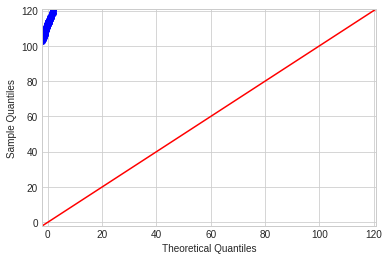

In [62]:
sm.qqplot(NBA['PTS'], line ='45')
py.show()

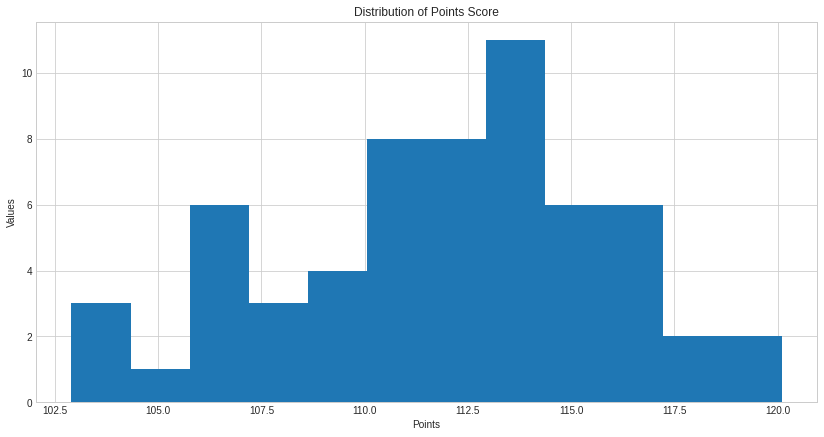

In [59]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid')
plt.hist(NBA['PTS'], bins = 12)
plt.title('Distribution of Points Score') 
plt.xlabel('Points') 
plt.ylabel('Values') 
plt.show()

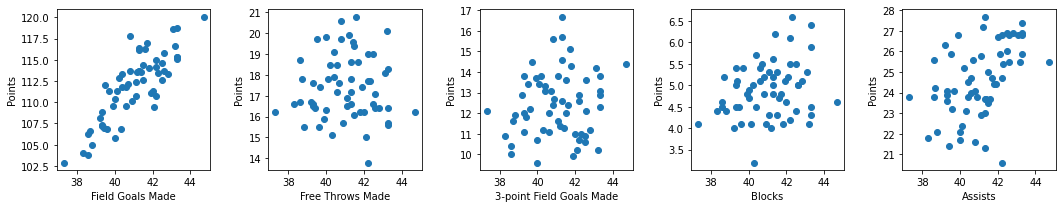

In [45]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.scatter(NBA['FGM'], NBA['PTS'])
plt.xlabel('Field Goals Made')
plt.ylabel('Points')

plt.subplot(1,5,2)
plt.scatter(NBA['FGM'], NBA['FTM'])
plt.xlabel('Free Throws Made')
plt.ylabel('Points')

plt.subplot(1,5,3)
plt.scatter(NBA['FGM'], NBA['FG3M'])
plt.xlabel('3-point Field Goals Made')
plt.ylabel('Points')

plt.subplot(1,5,4)
plt.scatter(NBA['FGM'], NBA['BLK'])
plt.xlabel('Blocks')
plt.ylabel('Points')

plt.subplot(1,5,5)
plt.scatter(NBA['FGM'], NBA['AST'])
plt.xlabel('Assists')
plt.ylabel('Points')

plt.tight_layout()

In [8]:
NBA_21_22 = NBA_21_22.drop(['CFPARAMS', 'CFID','TEAM_ID','GP','W','L','TEAM_NAME', 'GP_RANK','W_RANK','L_RANK','W_PCT_RANK','MIN_RANK','FGM_RANK',
'FGA_RANK','FG_PCT_RANK','FG3M_RANK','FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
'DREB_RANK','REB_RANK','AST_RANK','TOV_RANK','STL_RANK','BLK_RANK','BLKA_RANK','PF_RANK','PFD_RANK','PTS_RANK',
'PLUS_MINUS_RANK'], axis = 1)

In [9]:
NBA = NBA.drop(['CFPARAMS', 'CFID','TEAM_ID','GP','W','L','TEAM_NAME', 'GP_RANK','W_RANK','L_RANK','W_PCT_RANK','MIN_RANK','FGM_RANK',
'FGA_RANK','FG_PCT_RANK','FG3M_RANK','FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
'DREB_RANK','REB_RANK','AST_RANK','TOV_RANK','STL_RANK','BLK_RANK','BLKA_RANK','PF_RANK','PFD_RANK','PTS_RANK',
'PLUS_MINUS_RANK'], axis = 1)


In [9]:
NBA.corr()

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
W_PCT,1.000000,-0.064166,0.520923,-0.079686,0.688760,0.347074,0.138917,0.604490,0.182128,0.038758,...,0.425169,0.166070,-0.307449,-0.064896,0.248867,-0.633893,-0.044527,0.087098,0.611080,0.951341
MIN,-0.064166,1.000000,-0.023804,-0.027275,-0.012542,-0.257688,-0.200986,-0.191260,0.113934,0.132098,...,-0.044758,0.113513,0.108587,-0.026111,-0.040404,0.108713,0.110345,0.189439,-0.076122,-0.069333
FGM,0.520923,-0.023804,1.000000,0.561902,0.803084,0.137157,-0.012225,0.402920,0.009315,-0.051866,...,0.381611,0.468978,-0.249962,0.015244,0.265181,-0.299296,0.019283,-0.068647,0.831754,0.562281
FGA,-0.079686,-0.027275,0.561902,1.000000,-0.040603,0.098910,0.186639,-0.156364,0.077328,0.102756,...,0.393157,0.103049,-0.132382,0.172068,0.319291,0.194606,0.219443,-0.017013,0.506531,-0.012521
FG_PCT,0.688760,-0.012542,0.803084,-0.040603,1.000000,0.091246,-0.151612,0.597339,-0.035972,-0.129496,...,0.174439,0.497773,-0.200347,-0.094448,0.099235,-0.497226,-0.123952,-0.062976,0.642154,0.688847
FG3M,0.347074,-0.257688,0.137157,0.098910,0.091246,1.000000,0.926988,0.513031,0.020600,-0.109172,...,0.152105,-0.041954,-0.092102,-0.140280,0.043015,-0.262344,0.020987,-0.143175,0.509872,0.436103
FG3A,0.138917,-0.200986,-0.012225,0.186639,-0.151612,0.926988,1.000000,0.156764,0.066005,0.012316,...,0.129765,-0.091718,0.066658,-0.040823,0.059757,-0.108527,0.082650,-0.032957,0.384240,0.221352
FG3_PCT,0.604490,-0.191260,0.402920,-0.156364,0.597339,0.513031,0.156764,1.000000,-0.070932,-0.296443,...,0.092887,0.102618,-0.394140,-0.255286,-0.001666,-0.443164,-0.102089,-0.288776,0.484818,0.651395
FTM,0.182128,0.113934,0.009315,0.077328,-0.035972,0.020600,0.066005,-0.070932,1.000000,0.902357,...,0.210093,-0.138278,-0.005230,0.071716,0.229755,-0.006550,0.377739,0.758679,0.400384,0.214239
FTA,0.038758,0.132098,-0.051866,0.102756,-0.129496,-0.109172,0.012316,-0.296443,0.902357,1.000000,...,0.317934,-0.154290,0.218117,0.114332,0.261165,0.080916,0.354548,0.817662,0.264469,0.065968


**Variables with the largest absolute value of R-squared with respect to W.R.T points are FG_PCT , FG3_PCT, FT_PCT, DREB, REB, BLK, and BLKA.**

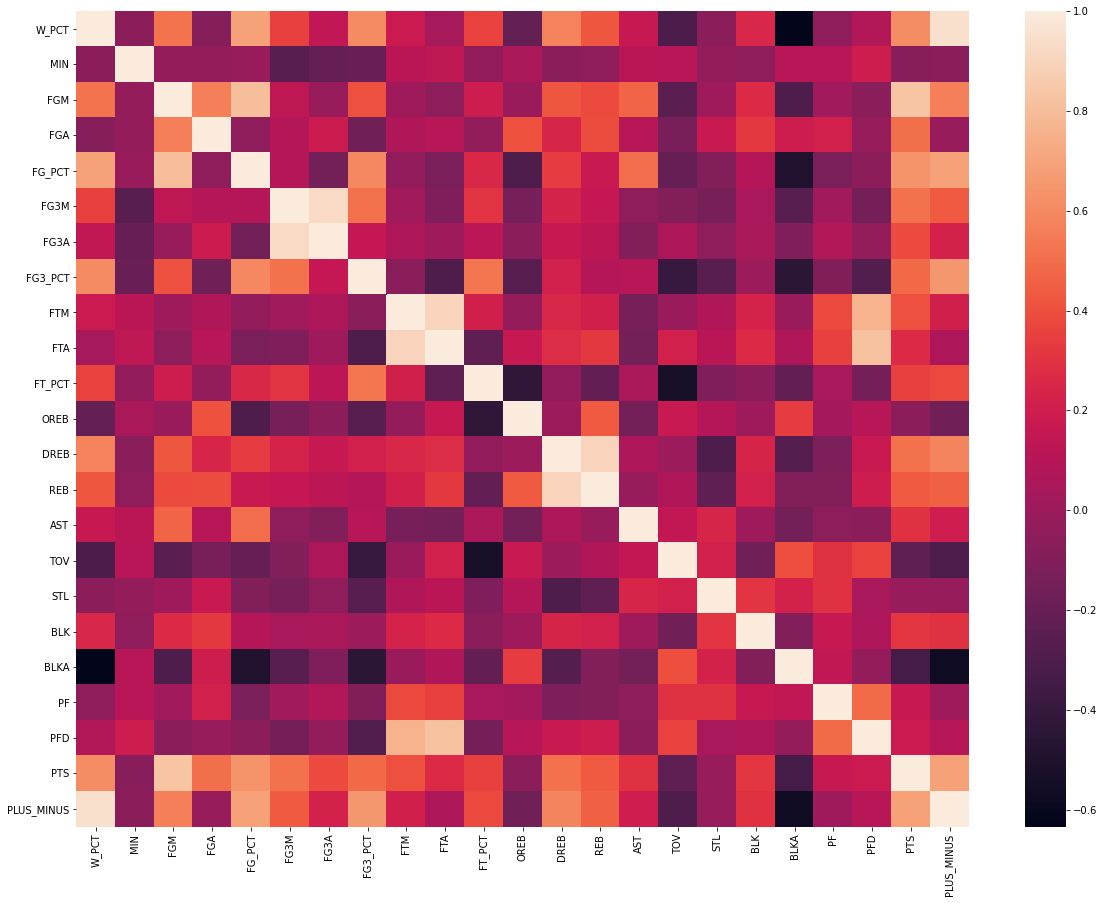

In [10]:
plt.subplots(figsize=(20,15))
sbs.heatmap(NBA.corr());

In [27]:
X = NBA[['FGM','FG3M','FTM','DREB','AST','BLK','BLKA']]
y = NBA['PTS']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_reg_mod = LinearRegression()

# Fit linear regression
lin_reg_mod.fit(X_train, y_train)

# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)


In [75]:
display(X_train)
display(y_train)
display(X_test)
display(y_test)

,FGM,FG3M,FTM,DREB,AST,BLK,BLKA
6,41.1,13.8,16.5,34.2,22.9,4.3,3.7
21,39.3,11.1,17.6,34.2,23.9,5.4,4.6
10,40.8,15.6,20.6,34.5,21.6,5.2,4.9
22,41.4,11.3,19.6,35.0,23.7,6.2,4.7
19,40.0,9.6,16.3,34.5,22.1,4.7,5.0
12,41.8,14.3,16.2,34.7,24.4,4.1,4.2
26,41.9,9.9,17.4,34.6,24.4,5.1,5.1
17,40.4,13.3,19.1,34.3,23.8,5.7,5.5
1,41.5,13.6,16.1,33.6,23.5,5.3,4.6
19,39.4,11.8,16.4,35.5,21.4,5.1,5.4


6     112.4
21    107.3
10    117.8
22    113.6
19    105.8
12    114.0
26    111.1
17    113.3
1     112.6
19    107.0
2     118.6
17    112.1
8     106.6
25    113.7
13    113.4
22    110.7
21    104.0
0     113.7
4     110.7
23    113.6
4     106.8
14    112.6
29    114.4
28    111.3
24    116.1
28    116.4
18    115.8
29    116.6
20    110.4
25    110.1
6     117.0
15    108.1
7     111.3
27    111.3
1     113.7
16    118.7
0     111.8
15    112.0
5     106.9
11    109.4
9     106.3
8     107.2
12    116.3
13    109.5
7     115.1
Name: PTS, dtype: float64

,FGM,FG3M,FTM,DREB,AST,BLK,BLKA
9,41.3,14.6,16.6,35.1,27.7,4.8,4.3
11,43.3,12.3,16.4,33.7,27.4,6.4,5.3
2,40.4,13.1,17.9,37.3,24.5,4.5,5.3
18,42.5,10.6,19.0,35.7,26.0,4.4,5.9
20,38.8,11.9,15.5,35.7,22.1,4.4,5.3
14,42.8,11.2,16.4,35.3,26.9,5.1,5.2
3,39.9,13.7,15.9,33.2,26.8,4.8,4.8
5,38.6,10.0,16.7,32.3,23.8,4.5,5.9
10,39.3,13.8,16.5,33.3,23.6,5.0,5.3
27,40.2,13.8,18.5,35.9,25.2,5.0,5.5


9     113.7
11    115.3
2     111.8
18    114.6
20    105.0
14    113.3
3     109.5
5     103.8
10    108.8
27    112.8
24    115.0
23    115.3
16    120.1
3     102.9
26    114.1
Name: PTS, dtype: float64

In [68]:
display(test_set_rmse)
display(test_set_r2)

0.08247072036387272

0.9996882878892736

In [29]:
ols = sm.OLS(y,X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.852e+07
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                   6.48e-167
Time:                        15:46:25   Log-Likelihood:                          73.078
No. Observations:                  60   AIC:                                     -132.2
Df Residuals:                      53   BIC:                                     -117.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FGM            1.9948      0.007    275.378      0.000       1.980       2.009
FG3M           0.9981      0.007    153.029      0.000       0.985       1.011
FTM            0.9935      0.007    148.895      0.000       0.980       1.007
DREB          -0.0027      0.006     -0.416      0.679      -0.016       0.010
AST            0.0097      0.006      1.501      0.139      -0.003       0.023
BLK            0.0325      0.016      1.992      0.052      -0.000       0.065
BLKA           0.0043      0.014      0.303      0.763      -0.024       0.033
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.314
Skew:                          -0.041   Prob(JB):                        0.855
Kurtosis:                       2.655   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
predictors = NBA.drop(['MIN', 'FG3A', 'FTM' , 'OREB', 'DREB', 'TOV', 'STL', 'BLK', 'PF','PFD','PLUS_MINUS'], axis = 1)
predictors['PTS'] = NBA['PTS']

,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3_PCT,FTA,FT_PCT,REB,AST,BLKA,PTS
0,0.299,40.6,90.6,0.449,12.0,0.333,23.4,0.790,43.3,24.0,6.4,111.8
1,0.667,41.3,89.6,0.461,12.6,0.364,23.2,0.801,46.1,23.0,5.5,113.7
2,0.486,40.4,90.3,0.448,13.1,0.343,24.1,0.745,47.9,24.5,5.3,111.8
3,0.354,37.3,85.9,0.434,12.1,0.352,21.6,0.748,42.8,23.8,5.0,102.9
4,0.338,39.6,88.6,0.447,12.2,0.348,20.5,0.755,41.9,23.2,5.9,106.8
5,0.292,40.3,87.9,0.458,11.2,0.351,19.9,0.758,44.2,23.1,6.3,106.9
6,0.573,41.7,90.3,0.461,15.1,0.367,23.8,0.779,46.9,24.7,4.1,117.0
7,0.630,42.0,88.9,0.473,11.0,0.359,20.9,0.777,44.1,26.7,4.4,111.3
8,0.303,39.3,85.7,0.459,12.0,0.367,22.4,0.743,41.7,24.1,5.6,107.2
9,0.231,38.6,88.2,0.438,10.4,0.334,23.2,0.803,42.8,25.6,4.9,106.3


In [74]:
X = predictors.drop(['W_PCT','PTS'] ,axis = 1 )
Y = NBA['PTS']

In [82]:
ols = sm.OLS(Y, sm.add_constant(X))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.44e-77
Time:                        16:47:42   Log-Likelihood:                 61.543
No. Observations:                  60   AIC:                            -101.1
Df Residuals:                      49   BIC:                            -78.05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.8554     11.128     -3.761      0.000     -64.219     -19.492
FGM            1.3942      0.271      5.137      0.000       0.849       1.940
FGA            0.2816      0.126      2.231      0.030       0.028       0.535
FG_PCT        51.7616     24.186      2.140      0.037       3.159     100.365
FG3M           1.0002      0.010     96.586      0.000       0.979       1.021
FG3_PCT       -0.1627      1.400     -0.116      0.908      -2.976       2.651
FTA            0.7782      0.008    103.289      0.000       0.763       0.793
FT_PCT        22.8037      0.545     41.836      0.000      21.708      23.899
REB           -0.0035      0.008     -0.419      0.677      -0.020       0.013
AST            0.0088      0.009      0.982      0.331      -0.009       0.027
BLKA           0.0032      0.024      0.132      0.896      -0.045       0.051
==============================================================================
Omnibus:                        0.754   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.553
Skew:                          -0.234   Prob(JB):                        0.759
Kurtosis:                       2.961   Cond. No.                     2.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X = NBA.drop(['W_PCT', 'PTS'], axis = 1)
y = NBA['PTS']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (48, 21) (48,)
Testing dataset shape: (12, 21) (12,)


In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [100]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _validate_y_class_weight
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
V

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _validate_y_class_weight
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit faile

In [65]:
# There was no available package for subset selection methods, so i stumbled upon these functions that were made at
# https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/
# So we define out function forward, which takes in your predictors, response, and a significance level. Make a variable
# which contains all of the columns of the data, and you intialize an empty list to symbolize your 'base' model.
# While you still ahve predictors 
def forward(data, target, sig =0.1):
    
    base = data.columns.tolist()
    
    best_preds = []
    
    while (len(base)>0):
        
        remaining_features = list(set(base)-set(best_preds))
        new_pval = pd.Series(index=remaining_features)
        for c in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_preds+[c]])).fit()
            new_pval[c] = model.pvalues[c]
        min_p_value = new_pval.min()
        if(min_p_value<sig):
            best_preds.append(new_pval.idxmin())
        else:
            break
    return best_preds

def backward(data, target,sig = 0.10):
    
    features = data.columns.tolist()
    
    while(len(features)>0):
        
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        
        if(max_p_value >= sig):
            
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            
        else:
            
            break 
    return features

In [66]:
forward(X,y)

<ipython-input-65-483b28f625f5>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-65-483b28f625f5>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-65-483b28f625f5>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-65-483b28f625f5>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['FGM', 'FG3M', 'FTM', 'STL']

In [28]:
backward(X,y)

['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FTM', 'PF']